## | - Nettoyage des données

### 1) Import Biblio Python & data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from scipy.stats import pearsonr, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as ss
import scipy.stats as stats
from dython.nominal import associations

In [5]:
df = pd.read_csv("../data/bronze.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.drop('customerID', axis=1, inplace=True)

In [7]:
df.shape

(7043, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
profile = ProfileReport(df, title="Profiling Report")

In [11]:
#profile.to_file('Churn_data_report.html')
#the open with live server (click droit)

### 2) Suppression des doublons

In [12]:
df.duplicated().sum()

22

In [13]:
df[df.duplicated()==True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.9,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.6,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.2,Yes


In [14]:
df = df.drop_duplicates()

### 3) Conversion des types

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

/tmp/ipykernel_33742/2744223278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [16]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### 4) Traitement des valeurs manquantes

In [17]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
# par une valeur statistiquement plausible
df["TotalCharges"] = df["TotalCharges"].fillna(int(df["TotalCharges"].median()))

/tmp/ipykernel_33742/4065722754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalCharges"] = df["TotalCharges"].fillna(int(df["TotalCharges"].median()))


In [19]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 5) Consistance des données (valeurs aberrantes, fautes orthographes…)

In [20]:
#Value count de l'ensemble des variables catégorielle (détecter les Uper case, fautes orthogr)
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2288.963146
std,0.368947,24.534965,30.069001,2265.316052
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,411.150000
50%,0.000000,29.000000,70.400000,1403.000000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


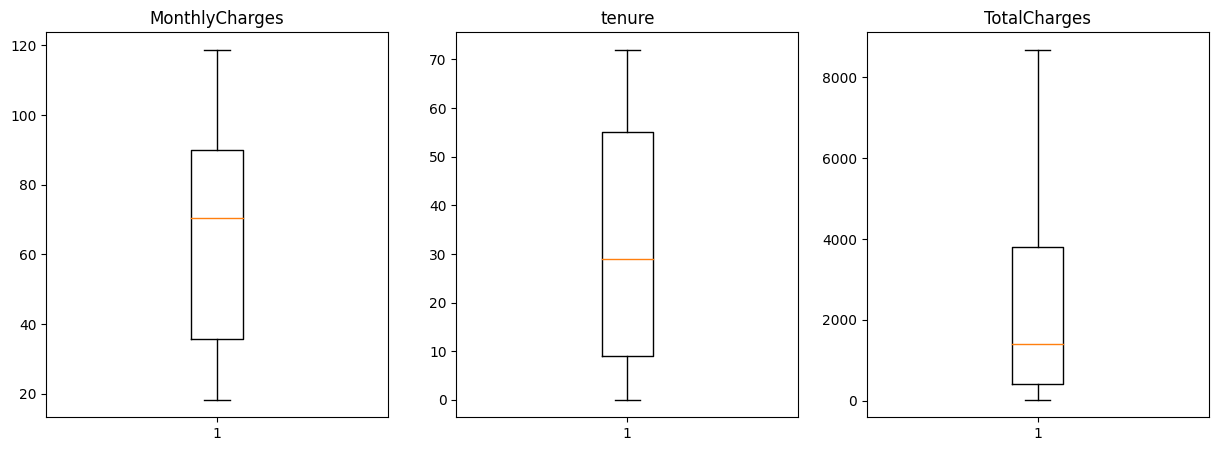

In [22]:
# Création des boxplots pour trois variables
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
variables = ['MonthlyCharges', 'tenure' ,'TotalCharges']
for i, variable in enumerate(variables):
    axs[i].boxplot(df[variable].dropna())
    axs[i].set_title(variable)

plt.show()

In [23]:
#EXporter la data dans un Csv 
df.to_csv('../data/silver.csv', index=False)

## || - Analyse des Données

### 1) Corrélations entre les variables

##### <font color="yellow">! Test khi-deux => H0 : l’hypothèse nulle est : « les deux variables testées sont indépendantes » ( si p-value < 5% on rejette H0)</font>

In [24]:
# Effectuer le test du chi-deux pour les variables catégorielles (gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod et Churn)
categorical_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                         'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for var in categorical_variables:
    contingency_table = pd.crosstab(df[var], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("P-value du Test du chi-deux pour la variable", var, ":", p)
  

P-value du Test du chi-deux pour la variable gender : 0.4794615390898278
P-value du Test du chi-deux pour la variable SeniorCitizen : 8.934159012714662e-37
P-value du Test du chi-deux pour la variable Partner : 1.0999615978939857e-35
P-value du Test du chi-deux pour la variable Dependents : 1.5995676694072134e-42
P-value du Test du chi-deux pour la variable PhoneService : 0.3664940064978197
P-value du Test du chi-deux pour la variable MultipleLines : 0.0020685599531309134
P-value du Test du chi-deux pour la variable InternetService : 1.0857790034735195e-159
P-value du Test du chi-deux pour la variable OnlineSecurity : 1.329226523787891e-184
P-value du Test du chi-deux pour la variable OnlineBackup : 8.614898409283198e-131
P-value du Test du chi-deux pour la variable DeviceProtection : 1.9555513236078665e-121
P-value du Test du chi-deux pour la variable TechSupport : 7.146857715828324e-180
P-value du Test du chi-deux pour la variable StreamingTV : 5.469454144000632e-82
P-value du Test d

##### <font color="yellow">! Test Fisher => H0 : l’hypothèse nulle est : « les deux variables testées sont indépendantes » ( si p-value < 5% on rejette H0)</font>

In [25]:
# Effectuer une ANOVA pour la variable catégorique Churn et la variable continue MonthlyCharges
model = ols('MonthlyCharges ~ Churn', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Effectuer une ANOVA pour la variable catégorique Churn et la variable continue TotalCharges
model = ols('TotalCharges ~ Churn', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Effectuer une ANOVA pour la variable catégorique Churn et la variable continue tenure
model = ols('tenure ~ Churn', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df           F        PR(>F)
Churn     2.401314e+05     1.0  275.993382  8.041922e-61
Residual  6.106965e+06  7019.0         NaN           NaN
                sum_sq      df           F        PR(>F)
Churn     1.411067e+09     1.0  286.141996  6.011458e-63
Residual  3.461316e+10  7019.0         NaN           NaN
                sum_sq      df           F         PR(>F)
Churn     5.221297e+05     1.0  989.515082  2.628095e-203
Residual  3.703661e+06  7019.0         NaN            NaN


- Le coefficient de corrélation de rang de Spearman mesure la corrélation entre deux variables ordinales ou continues.  
Il est également compris entre -1 et 1, où une valeur de -1 indique une corrélation négative parfaite,  
une valeur de 0 indique l'absence de corrélation et une valeur de 1 indique une corrélation positive parfaite  

In [26]:
# Calcul du coefficient de corrélation de rang de Spearman entre Churn et MonthlyCharges
corr, p_value = stats.spearmanr(df['Churn'], df['MonthlyCharges'])
print('Coefficient de corrélation de rang de Spearman :', corr)
print('p-value :', p_value)

# Calcul du coefficient de corrélation de rang de Spearman entre Churn et TotalCharges
corr, p_value = stats.spearmanr(df['Churn'], df['TotalCharges'])
print('Coefficient de corrélation de rang de Spearman :', corr)
print('p-value :', p_value)

# Calcul du coefficient de corrélation de rang de Spearman entre Churn et tenure
corr, p_value = stats.spearmanr(df['Churn'], df['tenure'])
print('Coefficient de corrélation de rang de Spearman :', corr)
print('p-value :', p_value)


Coefficient de corrélation de rang de Spearman : 0.18588259150234954
p-value : 1.2981745121133559e-55
Coefficient de corrélation de rang de Spearman : -0.23062403301470952
p-value : 2.0574318007529438e-85
Coefficient de corrélation de rang de Spearman : -0.3662283948413912
p-value : 8.255933507713209e-222


/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


##### <font color="yellow"> Conclusion Tests : </font>

- ON constate que les variables (MonthlyCharges, TotalCharges, tenure, SeniorCitizen,Partner,Dependents, MultipleLines, InternetService, OnlineSecurity, OnlineBackup , DeviceProtection , TechSupport , StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod ) ont une influence sur notre Target variable Churn

In [27]:
def cramers_v(var1, var2):
    confusion_matrix = pd.crosstab(var1, var2)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [28]:
cramers_v(df['Churn'], df['OnlineSecurity'])

0.3468995462124089

In [29]:
cramers_v(df['Churn'], df['TechSupport'])

0.3423974922438955

In [30]:
cramers_v(df['Churn'], df['Contract'])

0.4096073288722002

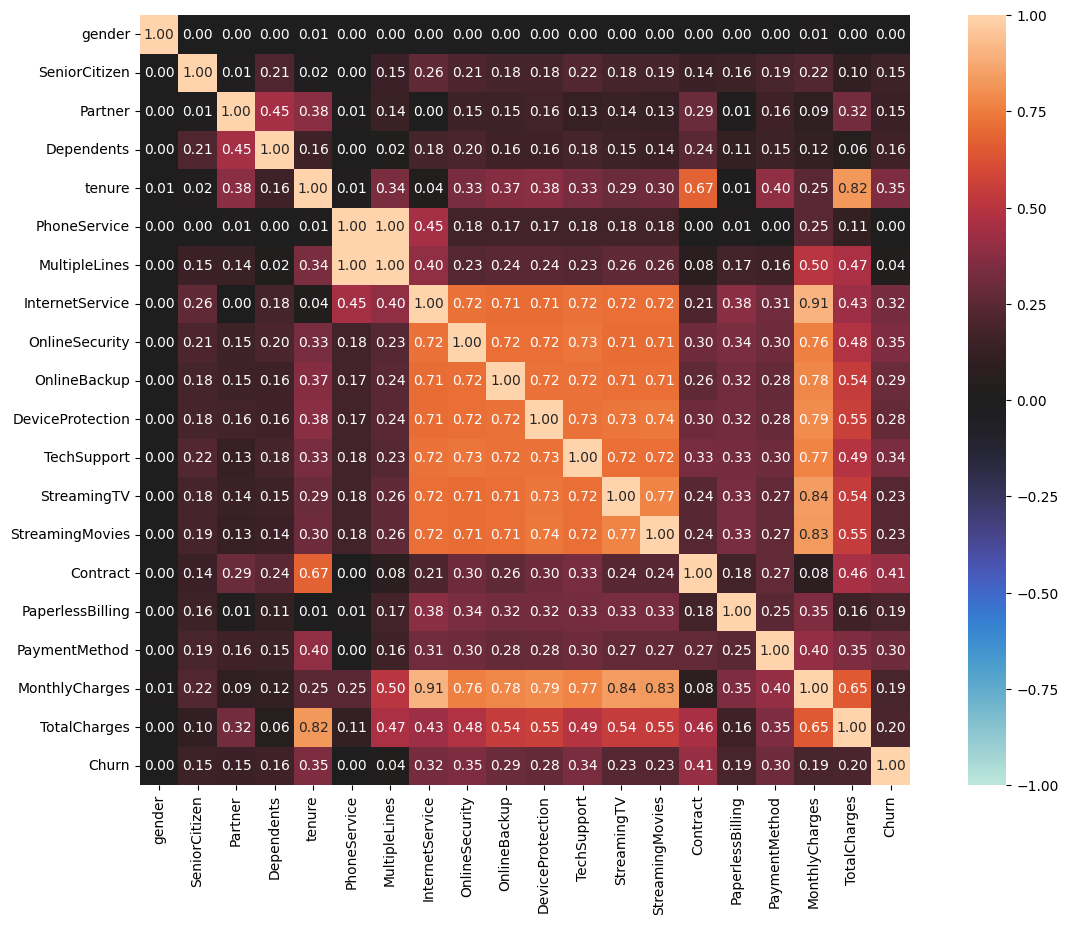

{'corr':                     gender  SeniorCitizen   Partner  Dependents    tenure  \
 gender            1.000000       0.000000  0.000000    0.000000  0.006185   
 SeniorCitizen     0.000000       1.000000  0.009359    0.211372  0.015349   
 Partner           0.000000       0.009359  1.000000    0.451223  0.377346   
 Dependents        0.000000       0.211372  0.451223    1.000000  0.157603   
 tenure            0.006185       0.015349  0.377346    0.157603  1.000000   
 PhoneService      0.000000       0.000000  0.013803    0.000000  0.009786   
 MultipleLines     0.000000       0.145026  0.140465    0.021243  0.340855   
 InternetService   0.000000       0.264347  0.000000    0.181531  0.035286   
 OnlineSecurity    0.000000       0.209867  0.150463    0.195540  0.334827   
 OnlineBackup      0.000000       0.181205  0.151664    0.163966  0.374990   
 DeviceProtection  0.000000       0.181515  0.164998    0.158846  0.375295   
 TechSupport       0.000000       0.222969  0.125864    

In [31]:
associations(df,nominal_columns=['chrune', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                         'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], numerical_columns=['MonthlyCharges', 'tenure' ,'TotalCharges'], mark_columns=False,nom_nom_assoc='cramer', 
             num_num_assoc='pearson', nom_num_assoc='correlation_ratio', symmetric_nom_nom=True, symmetric_num_num=True, 
             display_rows='all', display_columns='all', hide_rows=None, hide_columns=None, cramers_v_bias_correction=True, 
             nan_strategy='replace', nan_replace_value=0.0, ax=None,  annot=True, fmt='.2f', 
             cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title=None, 
             filename=None, multiprocessing=False, max_cpu_cores=None, figsize=(15, 10))